In [1]:
import numpy as np
import pandas as pd
from cuml.manifold.umap import UMAP1
from umap import UMAP
import cudf
import os

from sklearn import datasets
import matplotlib.pyplot as plt

import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 25, 12.5
rcParams['figure.dpi'] = 200

Run the following to use the mortgage / random dataset

In [2]:
n = 25
d = 4

In [3]:
import gzip
def load_data(nrows, ncols, cached = 'data/mortgage.npy.gz'):
    if os.path.exists(cached):
        print('use mortgage data')
        with gzip.open(cached) as f:
            X = np.load(f)
        X = X[np.random.randint(0,X.shape[0]-1,nrows),:ncols]
    else:
        print('use random data')
        X = np.random.uniform(-1, 1, (nrows,ncols)).astype(np.float32)
        print(str(X.shape))
    df = pd.DataFrame({'fea%d'%i:X[:,i] for i in range(X.shape[1])})
    return df

In [4]:
X = load_data(n, d)

use mortgage data


Run the following to use for MNIST dataset

In [2]:
digits = datasets.load_digits(n_class=9)

X = digits['data'].astype(np.float32)
y = digits['target']
X = pd.DataFrame({'fea%d'%i:X[:,i] for i in range(X.shape[1])})

In [3]:
%%time
X_d = cudf.DataFrame.from_pandas(X)

CPU times: user 388 ms, sys: 307 ms, total: 695 ms
Wall time: 887 ms


In [12]:
cumlUMAP = UMAP1()

DEALLOC!


In [63]:
%%time
fit = cumlUMAP.fit(X_d, n_neighbors = 15, n_epochs = 1000, init = "random")

kNN D=64
CPU times: user 6.65 s, sys: 512 ms, total: 7.17 s
Wall time: 1.34 s


In [64]:
y_hat = np.array(fit)

In [65]:
y_hat.dtype

dtype('float64')

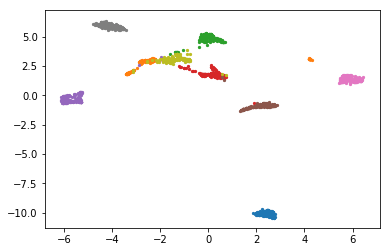

In [66]:
for i in range(9):
    pts = y_hat[y==i]
    plt.scatter(pts[:,1], pts[:,0], s=5)

In [67]:
sklUMAP = UMAP(n_neighbors = 15, n_epochs = 1000, init = "random")

In [68]:
%%time
y_hat = sklUMAP.fit_transform(X)

sigmas=[2.45730591 4.62367249 6.85272217 ... 3.26786804 2.08906555 4.71624756]
rhos=[10.95445156 14.2478075  17.43559456 ... 14.14213562 20.8326664
 20.59126091]
1-skeleton size: [   0    0    0 ... 1616 1616 1616]
1-skeleton size: [   0  791 1228 ... 1526 1040  382]
1-skeleton size: [0.         1.         0.47067457 ... 0.15921115 0.14920877 0.14656103]
nnz=30818
1-skeleton size: [   0    0    0 ... 1616 1616 1616]
1-skeleton size: [  27  249  258 ... 1568 1604 1615]
1-skeleton size: [0.16689157 0.07323211 0.02690245 ... 0.02991884 1.         0.17251235]
CPU times: user 9.11 s, sys: 677 ms, total: 9.79 s
Wall time: 5.84 s


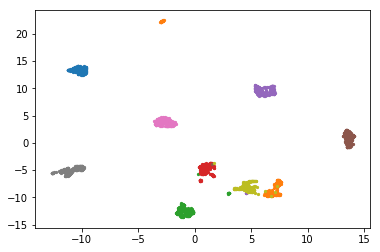

In [69]:
for i in range(9):
    pts = y_hat[y==i]
    plt.scatter(pts[:,1], pts[:,0], s=5)